In [1]:
import pickle
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [33]:
results = pickle.load(open('results.pkl', 'rb')) + pickle.load(open('results_end_to_end.pkl', 'rb'))
result_df = pd.DataFrame.from_dict(results)

force = lambda y,f: 1 - y*f
loss = lambda y,f: np.mean(np.maximum(0, force(y,f))**2, -1)
N_del = lambda y,f: np.sum(force(y,f) >= 0, -1)

result_df['test_loss'] = result_df.y_test_hat.apply(lambda f: loss(y_test, f))
result_df['train_loss'] = result_df.y_train_hat.apply(lambda f: loss(y_train, f))
result_df['N_del'] = result_df.y_train_hat.apply(lambda f: N_del(y_train, f))

result_df['N/P'] = result_df['N']/result_df['P']
result_df['P/N'] = result_df['P']/result_df['N']
result_df['N_del/P'] = result_df['N_del']/result_df['P']
result_df['N_del/N'] = result_df['N_del']/result_df['N']

result_end_to_end_df = result_df[result_df['lambda'] == 0]
result_df = result_df[result_df['lambda'] > 0]

In [34]:
X_train, X_test, y_train, y_test = pickle.load(open('mnist.pkl', 'rb'))

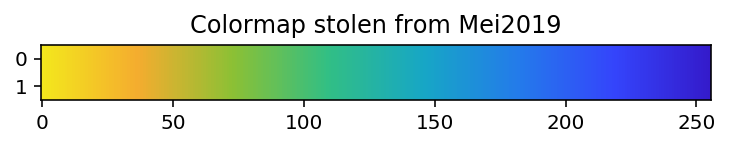

In [35]:
from matplotlib import colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list(
    'Mei2019', 
    np.array([
        (243, 232, 29),
        (245, 173, 47),
        (140, 193, 53),
        (50,  191, 133),
        (23,  167, 198),
        (36,  123, 235),
        (53,  69,  252),
        (52,  27,  203)
    ])/255., 
    N=256
)

# cmap = cc.m_bmy

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
fig = plt.figure(figsize=(6,.5))
img = plt.imshow(gradient, aspect='auto', cmap=cmap)
title = plt.title('Colormap stolen from Mei2019')

norm=mcolors.LogNorm()

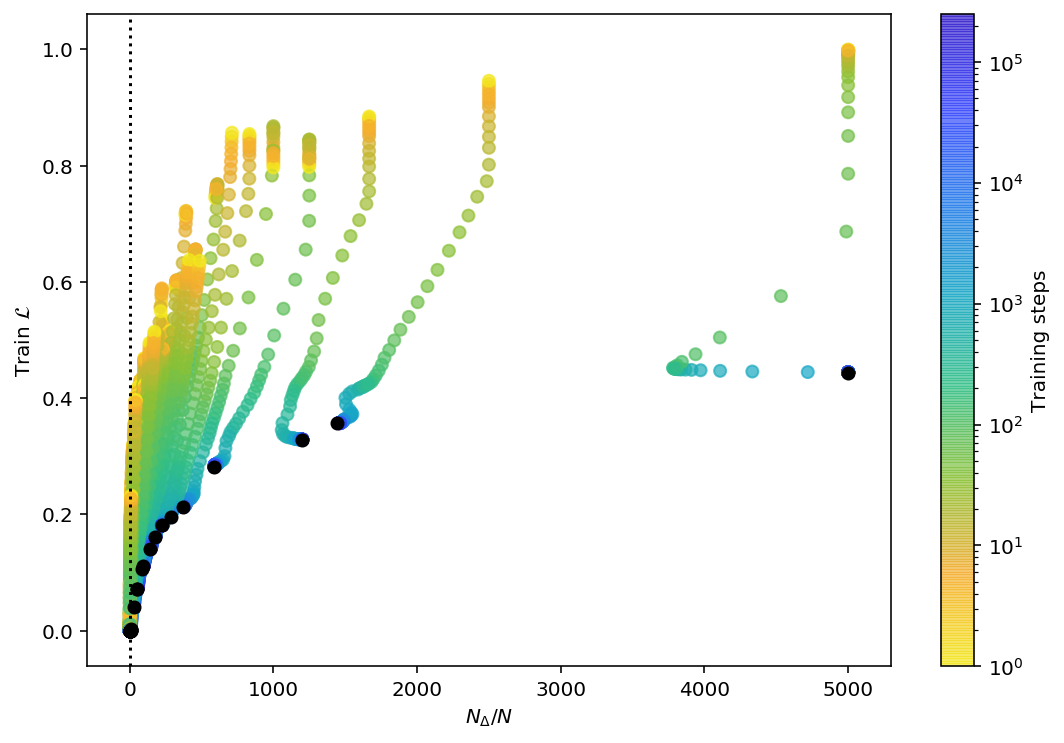

In [36]:
plt.figure(figsize=(9,6))
data = result_df

#invisible plot to set the limits correctly because matplotlib gets confused with log scale scatters
x = data['N_del/N']
y = data['train_loss']

plt.plot(x, y, color='none')
plt.scatter(x, y, c=data['step'], cmap=cmap, norm=norm, alpha=.7)
plt.colorbar(label='Training steps')

plt.xlabel(r'$N_\Delta/N$')
plt.ylabel(r'Train $\mathcal{L}$')

#Plot end_to_end result
data = result_end_to_end_df
x = data['N_del/N']
y = data['train_loss']
plt.scatter(x, y, c='k')

# plt.yscale('log')
# plt.xscale('log')
plt.axvline(1, color='k',ls=':')

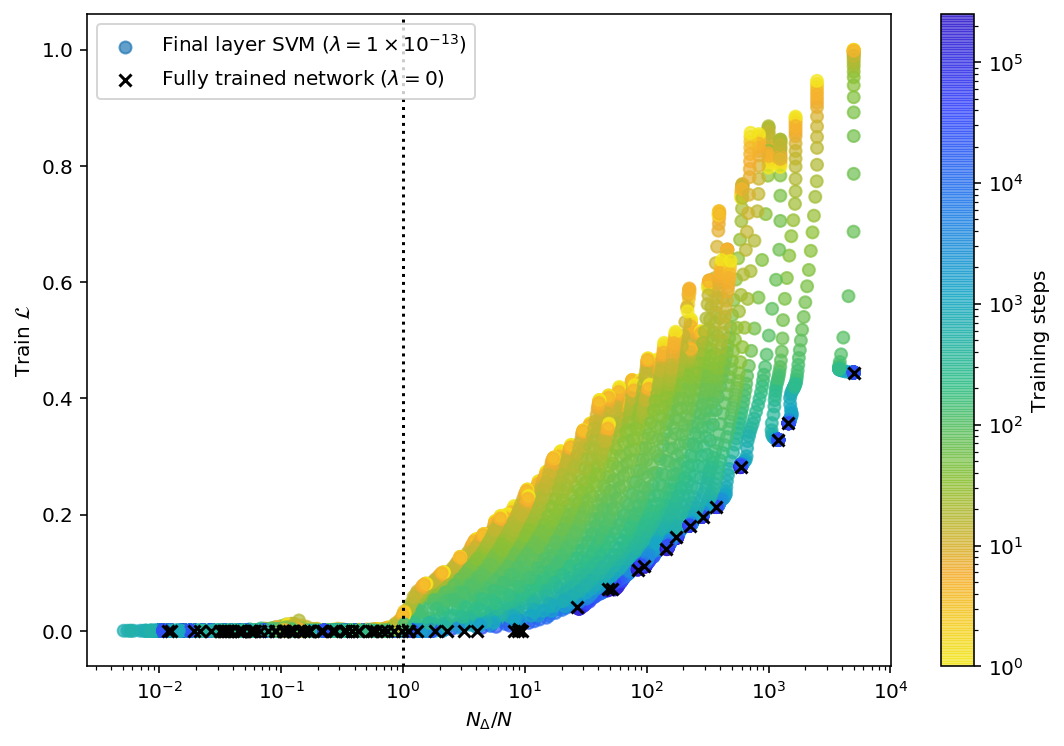

In [94]:
plt.figure(figsize=(9,6))
data = result_df

#invisible plot to set the limits correctly because matplotlib gets confused with log scale scatters
x = data['N_del/N']
y = data['train_loss']

plt.plot(x, y, color='none')
plt.scatter(x, y, c=data['step'], cmap=cmap, norm=norm, alpha=.7, label=r'Final layer SVM ($\lambda=1\times10^{-13}$)')
plt.colorbar(label='Training steps')

#Plot end_to_end result
data = result_end_to_end_df
x = data['N_del/N']
y = data['train_loss']
plt.scatter(x, y, c='k', label='Fully trained network ($\lambda=0$)', marker='x')

plt.xlabel(r'$N_\Delta/N$')
plt.ylabel(r'Train $\mathcal{L}$')

# plt.yscale('log')
plt.xscale('log')
plt.axvline(1, color='k',ls=':')

plt.legend()

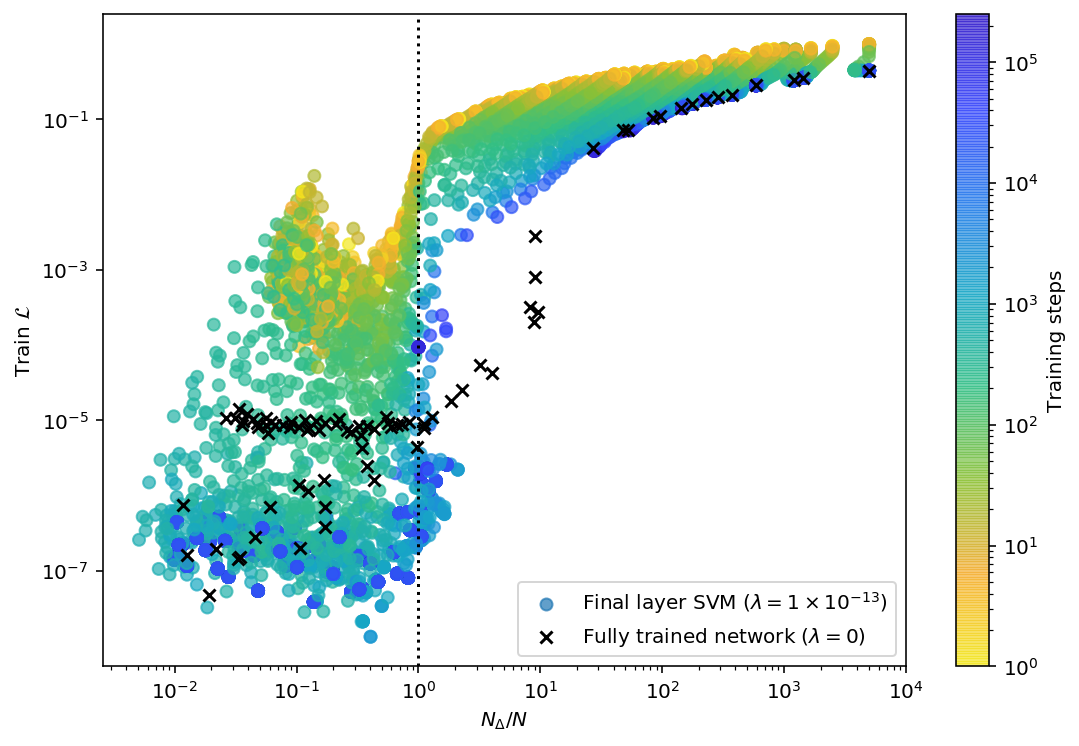

In [87]:
plt.figure(figsize=(9,6))
data = result_df

#invisible plot to set the limits correctly because matplotlib gets confused with log scale scatters
x = data['N_del/N']
y = data['train_loss']

plt.plot(x, y, color='none')
plt.scatter(x, y, c=data['step'], cmap=cmap, norm=norm, alpha=.7, label=r'Final layer SVM ($\lambda=1\times10^{-13}$)')
plt.colorbar(label='Training steps')

#Plot end_to_end result
data = result_end_to_end_df
x = data['N_del/N']
y = data['train_loss']
plt.scatter(x, y, c='k', label='Fully trained network ($\lambda=0$)', marker='x')

plt.xlabel(r'$N_\Delta/N$')
plt.ylabel(r'Train $\mathcal{L}$')

plt.yscale('log')
plt.xscale('log')
plt.axvline(1, color='k',ls=':')
plt.legend()

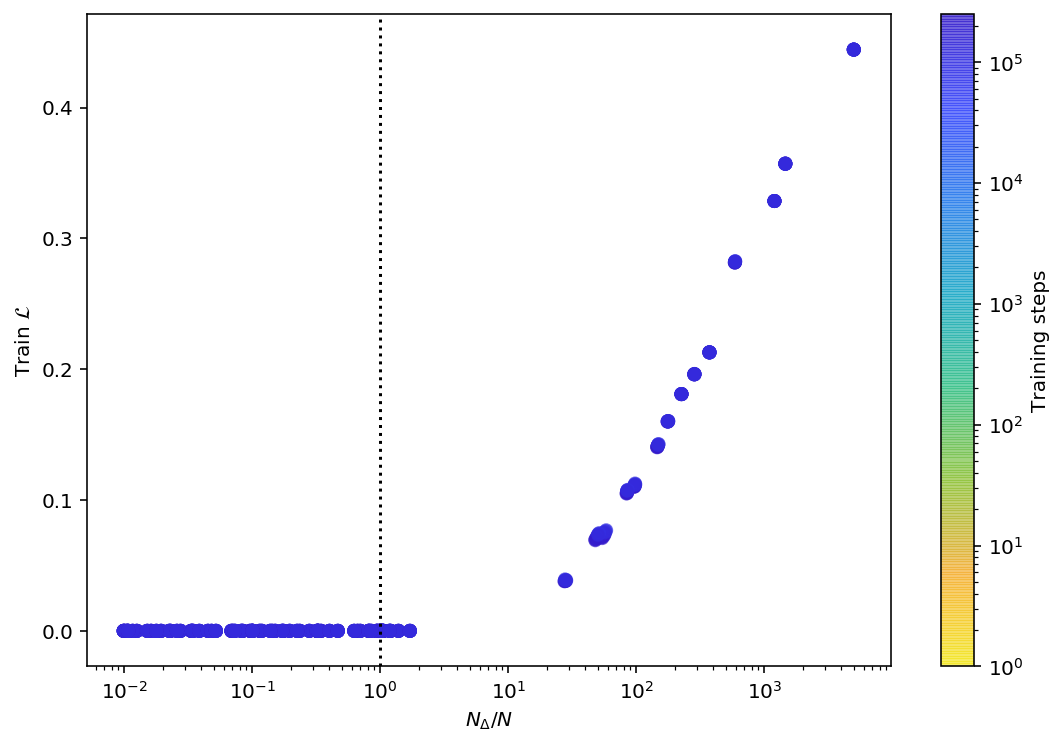

In [85]:
plt.figure(figsize=(9,6))
data = result_df.query('step > 1e5')

#invisible plot to set the limits correctly because matplotlib gets confused with log scale scatters
x = data['N_del/N']
y = data['train_loss']

plt.plot(x, y, color='none')
plt.scatter(x, y, c=data['step'], cmap=cmap, norm=norm, alpha=.7)
plt.colorbar(label='Training steps')

plt.xlabel(r'$N_\Delta/N$')
plt.ylabel(r'Train $\mathcal{L}$')

# plt.yscale('log')
plt.xscale('log')
plt.axvline(1, color='k',ls=':')

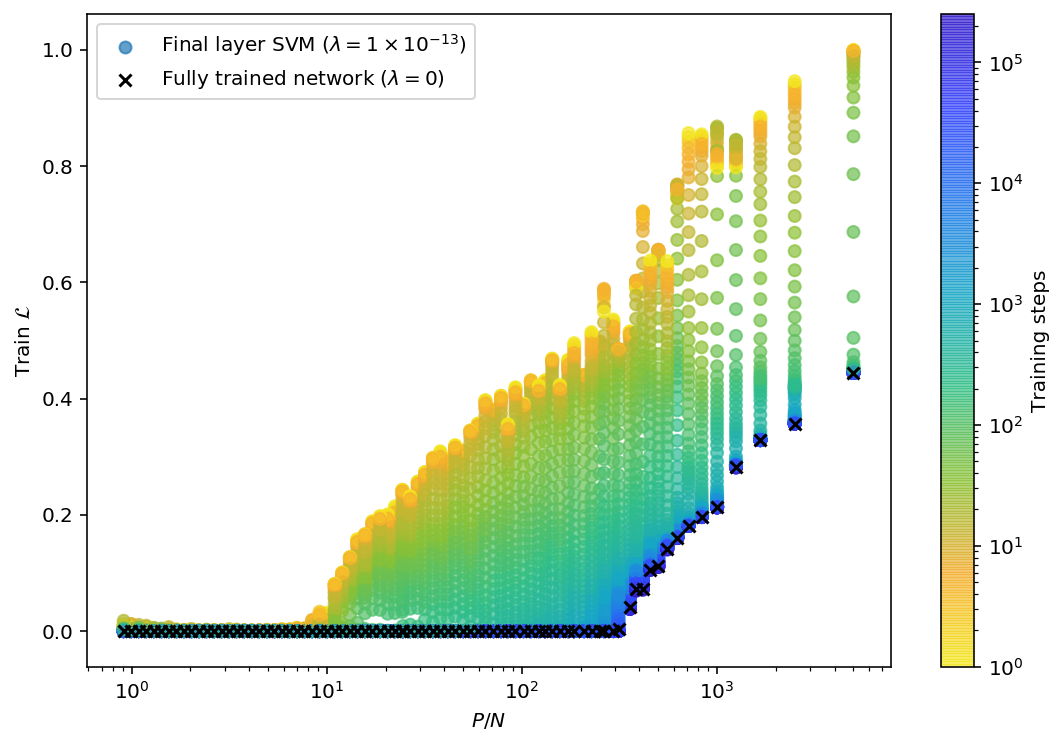

In [89]:
plt.figure(figsize=(9,6))
data = result_df

#invisible plot to set the limits correctly because matplotlib gets confused with log scale scatters
x = data['P/N']
y = data['train_loss']

plt.plot(x, y, color='none')
plt.scatter(x, y, c=data['step'], cmap=cmap, norm=norm, alpha=.7, label=r'Final layer SVM ($\lambda=1\times10^{-13}$)')
plt.colorbar(label='Training steps')


#Plot end_to_end result
data = result_end_to_end_df
x = data['P/N']
y = data['train_loss']
plt.scatter(x, y, c='k', label='Fully trained network ($\lambda=0$)', marker='x')


plt.xlabel(r'$P/N$')
plt.ylabel(r'Train $\mathcal{L}$')

# plt.yscale('log')
plt.xscale('log')
plt.legend()

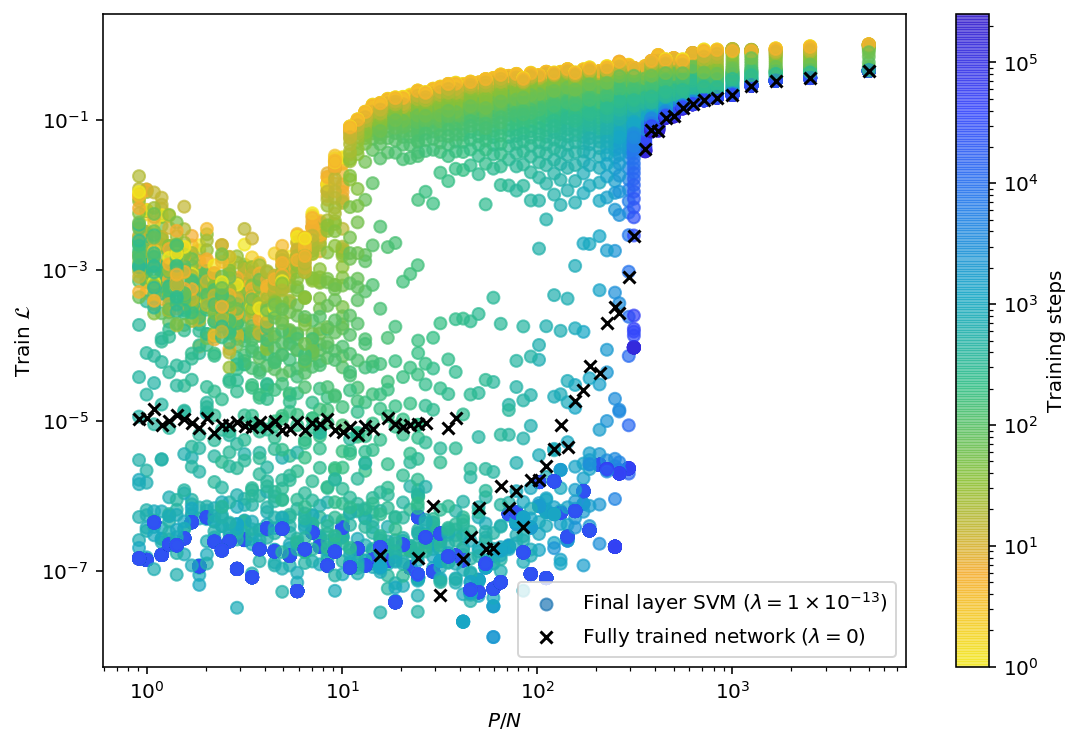

In [90]:
plt.figure(figsize=(9,6))
data = result_df

#invisible plot to set the limits correctly because matplotlib gets confused with log scale scatters
x = data['P/N']
y = data['train_loss']

plt.plot(x, y, color='none')
plt.scatter(x, y, c=data['step'], cmap=cmap, norm=norm, alpha=.7, label=r'Final layer SVM ($\lambda=1\times10^{-13}$)')
plt.colorbar(label='Training steps')


#Plot end_to_end result
data = result_end_to_end_df
x = data['P/N']
y = data['train_loss']
plt.scatter(x, y, c='k', label='Fully trained network ($\lambda=0$)', marker='x')


plt.xlabel(r'$P/N$')
plt.ylabel(r'Train $\mathcal{L}$')

plt.yscale('log')
plt.xscale('log')
plt.legend()

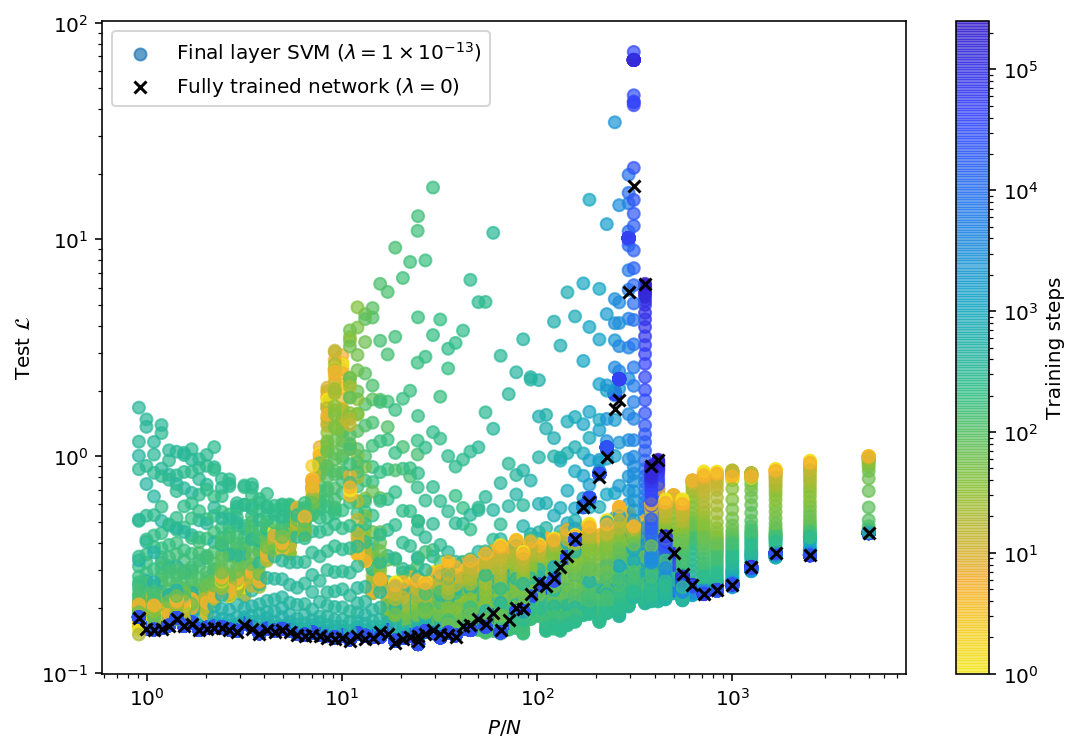

In [92]:
plt.figure(figsize=(9,6))
data = result_df

#invisible plot to set the limits correctly because matplotlib gets confused with log scale scatters
x = data['P/N']
y = data['test_loss']

plt.plot(x, y, color='none')
plt.scatter(x, y, c=data['step'], cmap=cmap, norm=norm, alpha=.7, label=r'Final layer SVM ($\lambda=1\times10^{-13}$)')
plt.colorbar(label='Training steps')

#Plot end_to_end result
data = result_end_to_end_df
x = data['P']/data['N']
y = data['test_loss']
plt.scatter(x, y, c='k', label='Fully trained network ($\lambda=0$)', marker='x')

plt.xlabel(r'$P/N$')
plt.ylabel(r'Test $\mathcal{L}$')

plt.yscale('log')
plt.xscale('log')

plt.legend()

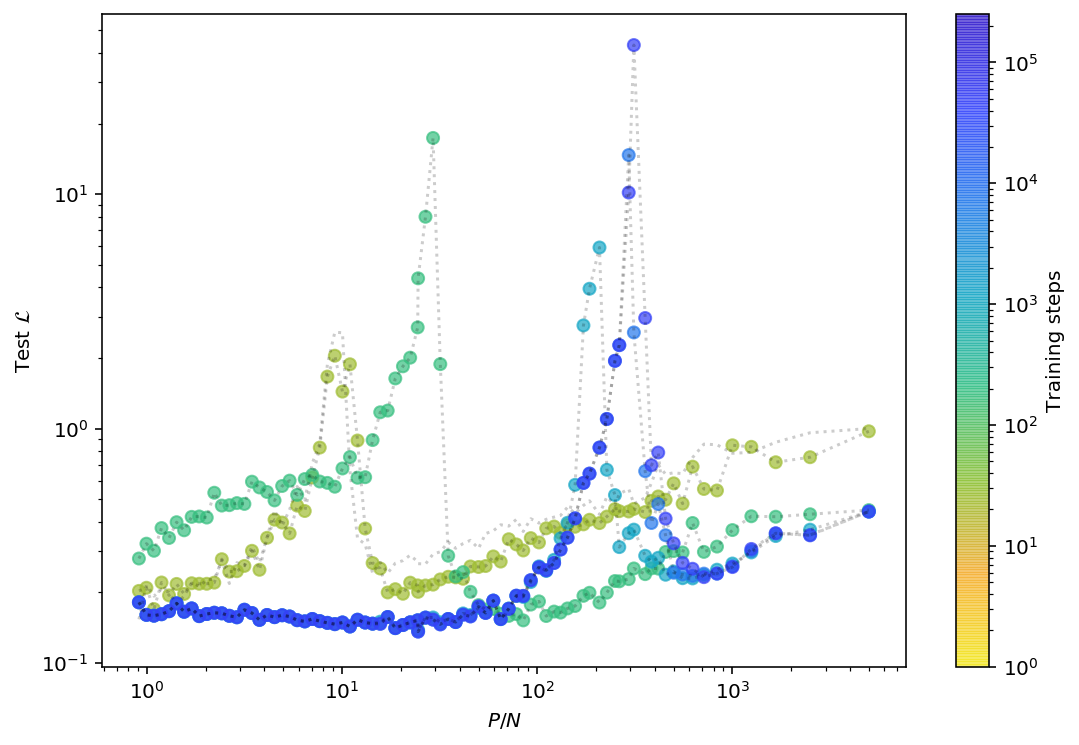

In [137]:
plt.figure(figsize=(9,6))

for step in sorted(result_df.step.unique())[::15]:
    data = result_df.query('step == @step')

    #invisible plot to set the limits correctly because matplotlib gets confused with log scale scatters
    x = data['P/N']
    y = data['test_loss']

    plt.plot(x.values[np.argsort(x)], y.values[np.argsort(x)], ls=':', c='k', alpha=.2)
    plt.scatter(x, y, c=data['step'], cmap=cmap, norm=norm, alpha=.7)
plt.colorbar(label='Training steps')

plt.xlabel(r'$P/N$')
plt.ylabel(r'Test $\mathcal{L}$')

plt.yscale('log')
plt.xscale('log')

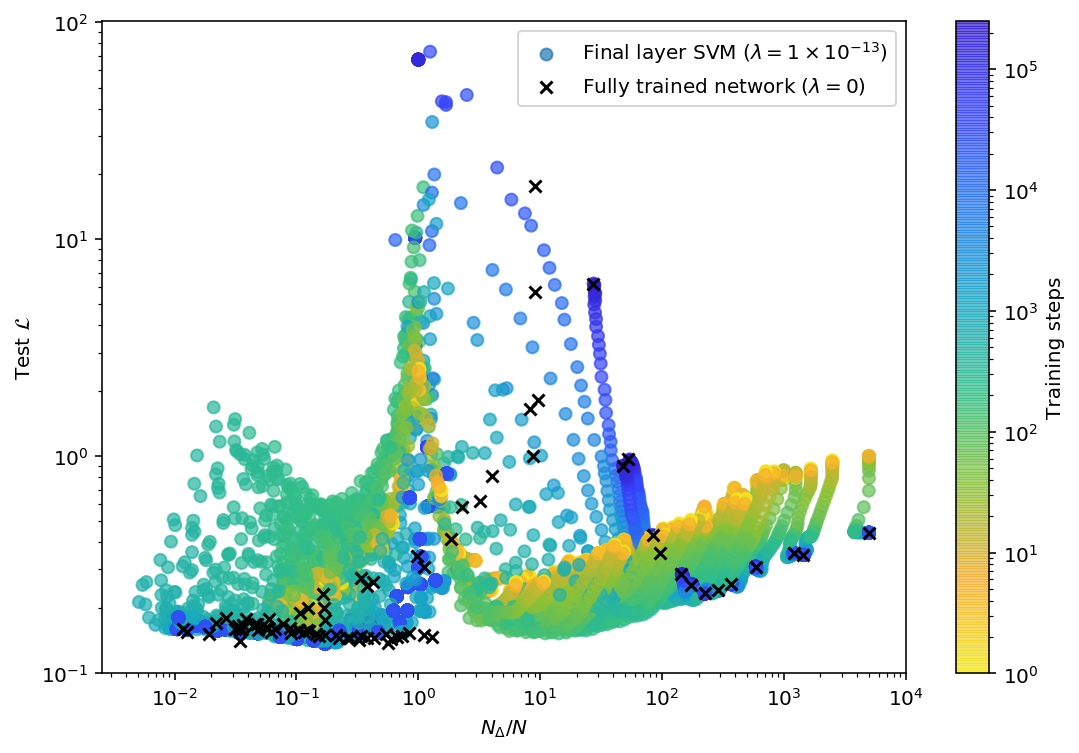

In [95]:
plt.figure(figsize=(9,6))
data = result_df

#invisible plot to set the limits correctly because matplotlib gets confused with log scale scatters
x = data['N_del/N']
y = data['test_loss']

plt.plot(x, y, color='none')
plt.scatter(x, y, c=data['step'], cmap=cmap, norm=norm, alpha=.7, label=r'Final layer SVM ($\lambda=1\times10^{-13}$)')
plt.colorbar(label='Training steps')

#Plot end_to_end result
data = result_end_to_end_df
x = data['N_del/N']
y = data['test_loss']
plt.scatter(x, y, c='k', label='Fully trained network ($\lambda=0$)', marker='x')

plt.xlabel(r'$N_\Delta/N$')
plt.ylabel(r'Test $\mathcal{L}$')

plt.yscale('log')
plt.xscale('log')

plt.legend()

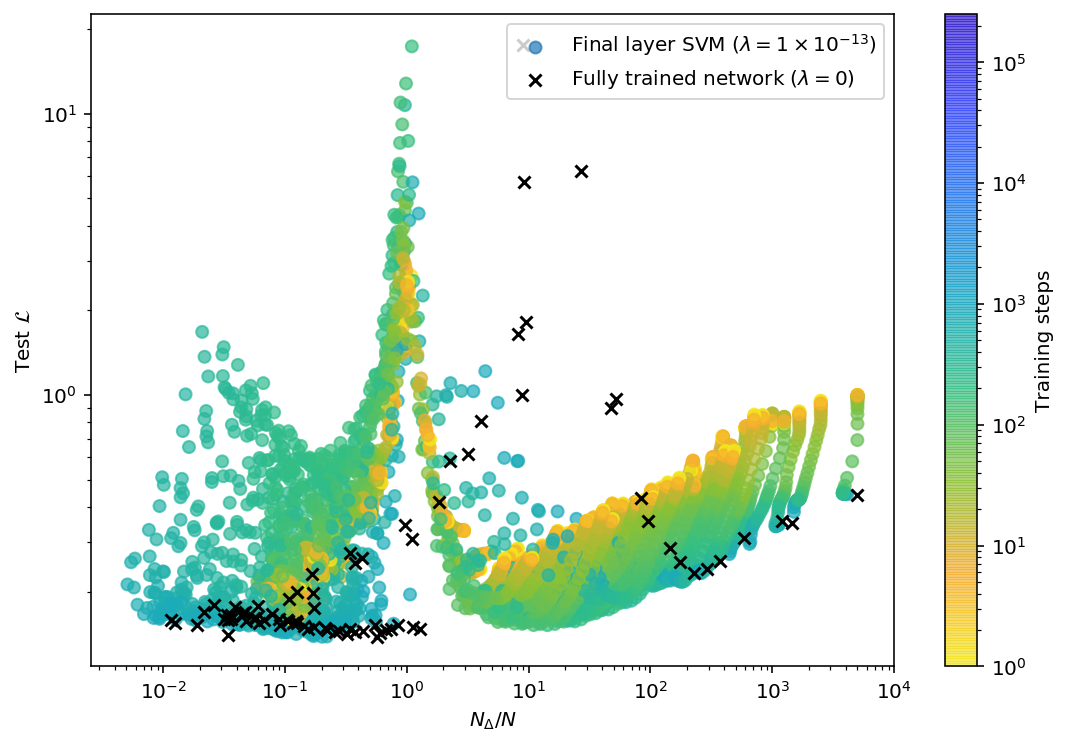

In [96]:
plt.figure(figsize=(9,6))
data = result_df[result_df.step < 1e3]

#invisible plot to set the limits correctly because matplotlib gets confused with log scale scatters
x = data['N_del/N']
y = data['test_loss']

plt.plot(x, y, color='none')
plt.scatter(x, y, c=data['step'], cmap=cmap, norm=norm, alpha=.7, label=r'Final layer SVM ($\lambda=1\times10^{-13}$)')
plt.colorbar(label='Training steps')

#Plot end_to_end result
data = result_end_to_end_df
x = data['N_del/N']
y = data['test_loss']
plt.scatter(x, y, c='k', label='Fully trained network ($\lambda=0$)', marker='x')

plt.xlabel(r'$N_\Delta/N$')
plt.ylabel(r'Test $\mathcal{L}$')

plt.yscale('log')
plt.xscale('log')

plt.legend()

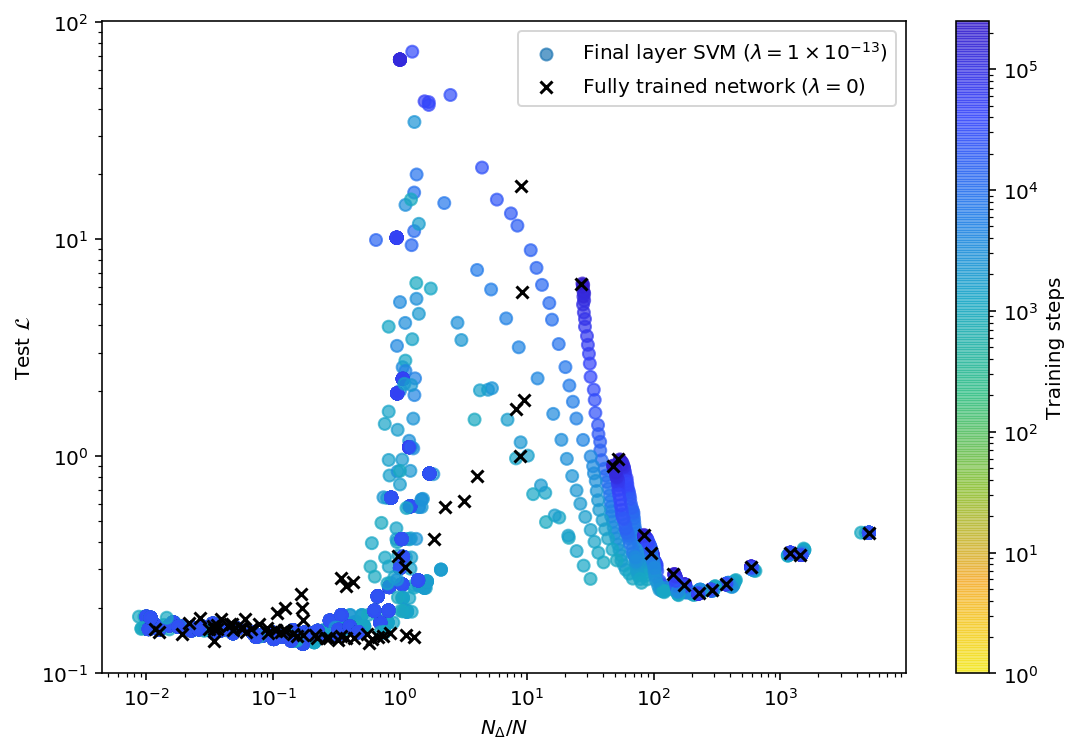

In [97]:
plt.figure(figsize=(9,6))
data = result_df[result_df.step > 1e3]

#invisible plot to set the limits correctly because matplotlib gets confused with log scale scatters
x = data['N_del/N']
y = data['test_loss']

plt.plot(x, y, color='none')
plt.scatter(x, y, c=data['step'], cmap=cmap, norm=norm, alpha=.7, label=r'Final layer SVM ($\lambda=1\times10^{-13}$)')
plt.colorbar(label='Training steps')

#Plot end_to_end result
data = result_end_to_end_df
x = data['N_del/N']
y = data['test_loss']
plt.scatter(x, y, c='k', label='Fully trained network ($\lambda=0$)', marker='x')

plt.xlabel(r'$N_\Delta/N$')
plt.ylabel(r'Test $\mathcal{L}$')

plt.yscale('log')
plt.xscale('log')

plt.legend()

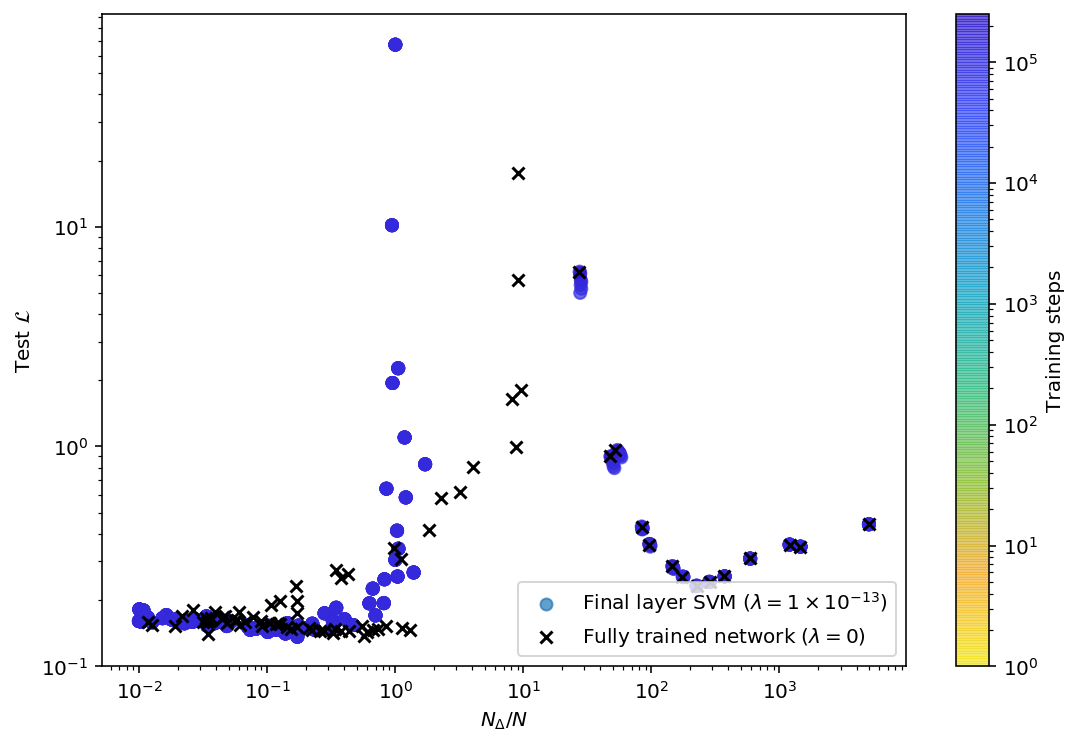

In [106]:
plt.figure(figsize=(9,6))
data = result_df[result_df.step > 1e5]

#invisible plot to set the limits correctly because matplotlib gets confused with log scale scatters
x = data['N_del/N']
y = data['test_loss']

plt.plot(x, y, color='none')
plt.scatter(x, y, c=data['step'], cmap=cmap, norm=norm, alpha=.7, label=r'Final layer SVM ($\lambda=1\times10^{-13}$)')
plt.colorbar(label='Training steps')

#Plot end_to_end result
data = result_end_to_end_df
x = data['N_del/N']
y = data['test_loss']
plt.scatter(x, y, c='k', label='Fully trained network ($\lambda=0$)', marker='x')

plt.xlabel(r'$N_\Delta/N$')
plt.ylabel(r'Test $\mathcal{L}$')

plt.yscale('log')
plt.xscale('log')

plt.legend(loc='lower right')

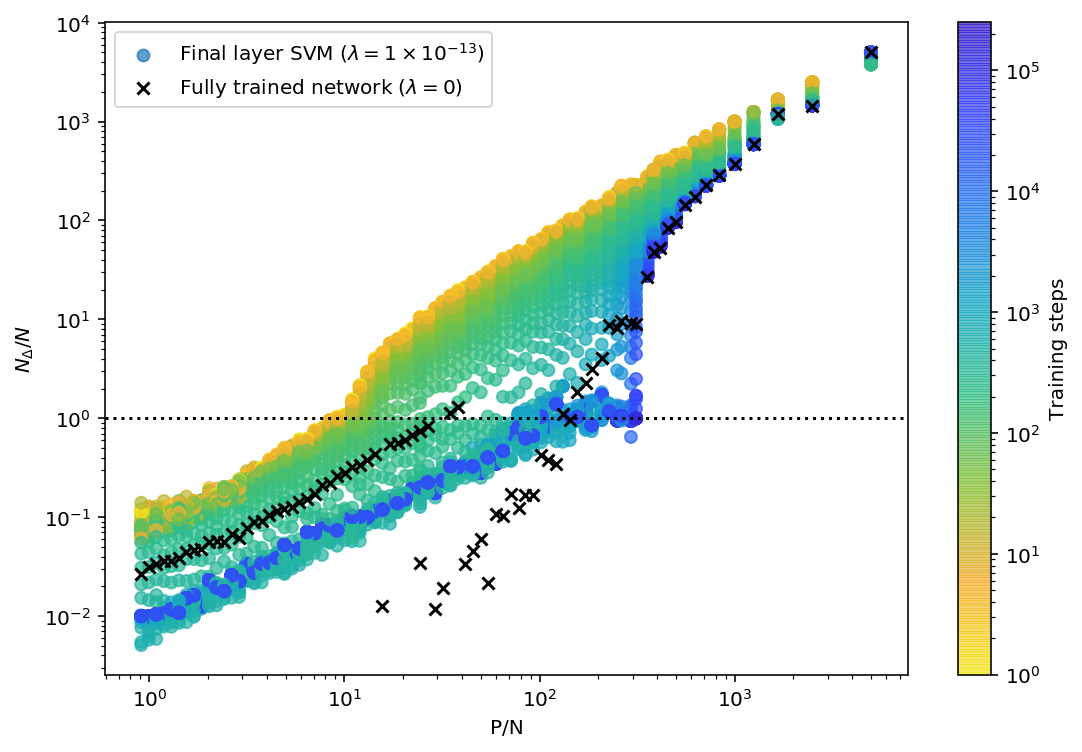

In [99]:
plt.figure(figsize=(9,6))
data = result_df

#invisible plot to set the limits correctly because matplotlib gets confused with log scale scatters
x = data['P/N']
y = data['N_del/N']

plt.plot(x, y, color='none')
plt.scatter(x, y, c=data['step'], cmap=cmap, norm=norm, alpha=.7, label=r'Final layer SVM ($\lambda=1\times10^{-13}$)')
plt.colorbar(label='Training steps')

#Plot end_to_end result
data = result_end_to_end_df
x = data['P/N']
y = data['N_del/N']
plt.scatter(x, y, c='k', label='Fully trained network ($\lambda=0$)', marker='x')

plt.xlabel('P/N')
plt.ylabel(r'$N_{\Delta}/N$')

plt.yscale('log')
plt.xscale('log')
plt.axhline(1, color='k',ls=':')
plt.legend()

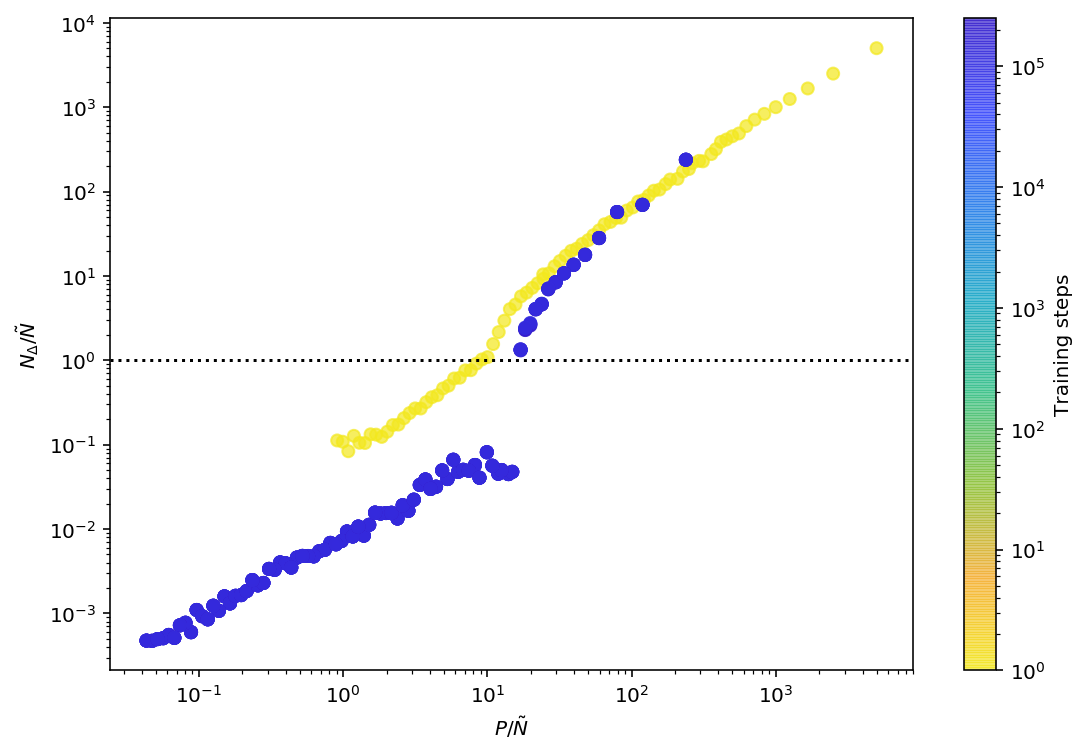

In [105]:
plt.figure(figsize=(9,6))


#Plot random features
data = result_df[result_df.step == 1]
x = data['P/N']
y = data['N_del/N']
#invisible plot to set the limits correctly because matplotlib gets confused with log scale scatters
plt.plot(x, y, color='none')
plt.scatter(x, y, c=data['step'], cmap=cmap, norm=norm, alpha=.7, label=r'Final layer SVM ($\lambda=1\times10^{-13}$)')
plt.colorbar(label='Training steps')


#Plot highly trained features
data = result_df[result_df.step > 1e5]
x = data['P/N']/(data['d']+1)
y = data['N_del/N']/(data['d']+1)
#invisible plot to set the limits correctly because matplotlib gets confused with log scale scatters
plt.plot(x, y, color='none')
plt.scatter(x, y, c=data['step'], cmap=cmap, norm=norm, alpha=.7)

plt.xlabel(r'$P/ \tilde N$')
plt.ylabel(r'$N_{\Delta} / \tilde N$')

plt.yscale('log')
plt.xscale('log')››
plt.axhline(1, color='k',ls=':')

# plt.legend()

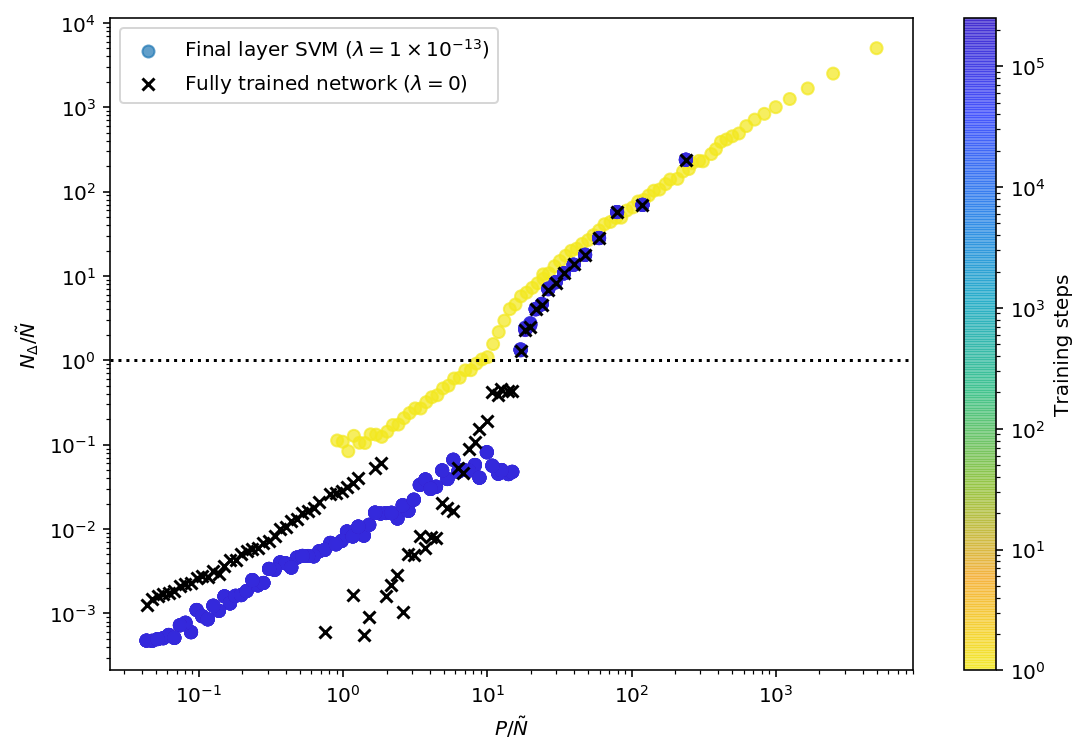

In [104]:
plt.figure(figsize=(9,6))


#Plot random features
data = result_df[result_df.step == 1]
x = data['P/N']
y = data['N_del/N']
#invisible plot to set the limits correctly because matplotlib gets confused with log scale scatters
plt.plot(x, y, color='none')
plt.scatter(x, y, c=data['step'], cmap=cmap, norm=norm, alpha=.7, label=r'Final layer SVM ($\lambda=1\times10^{-13}$)')
plt.colorbar(label='Training steps')


#Plot highly trained features
data = result_df[result_df.step > 1e5]
x = data['P/N']/(data['d']+1)
y = data['N_del/N']/(data['d']+1)
#invisible plot to set the limits correctly because matplotlib gets confused with log scale scatters
plt.plot(x, y, color='none')
plt.scatter(x, y, c=data['step'], cmap=cmap, norm=norm, alpha=.7)


#Plot end_to_end result
data = result_end_to_end_df
x = data['P']/data['N_tilde']
y = data['N_del']/data['N_tilde']
#invisible plot to set the limits correctly because matplotlib gets confused with log scale scatters
plt.plot(x, y, color='none')
plt.scatter(x, y, c='k', label='Fully trained network ($\lambda=0$)', marker='x')



plt.xlabel(r'$P/ \tilde N$')
plt.ylabel(r'$N_{\Delta} / \tilde N$')

plt.yscale('log')
plt.xscale('log')
plt.axhline(1, color='k',ls=':')

plt.legend()

Why does the threshold $N_\Delta/N = 1$ persist even throughout training?
- maybe it doesn't, but the change in $N_{eff} \ $ is linear rather than exponential, so it isn't showing up on the log-log plots?

(0.001, 3)

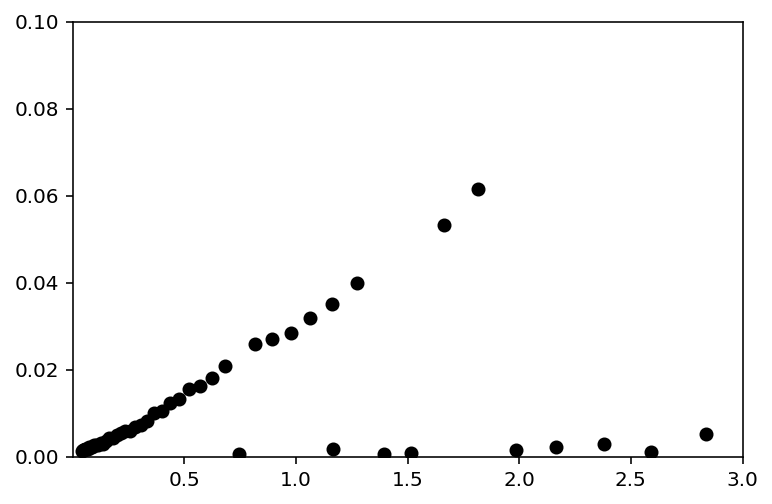

In [65]:
#Plot end_to_end result
data = result_end_to_end_df
x = data['P']/data['N_tilde']
y = data['N_del']/data['N_tilde']
plt.scatter(x, y, c='k')
# plt.xscale('log')
# plt.yscale('log')
plt.ylim(0, .1)
plt.xlim(1e-3, 3)